# 클린업 2주차 패키지 과제 - 3팀 선형대수학팀 김지민

## Chapter 1. 모델링을 위한 전처리

### 문제 0 기본 세팅

In [1]:
library(tidyverse)
library(data.table)
library(VIM)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.3     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.4.0     √ forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


Warning message:
"package 'VIM' was built under R version 4.0.4"
Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep



In [2]:
setwd('C:/Users/fleur/2021 P-SAT/패키지과제/클린업 2주차')

In [3]:
dataset = fread('data.csv', data.table = FALSE)

In [4]:
dataset %>% head()

,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,surplus2,employee1,employee2,ownerChange
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int64>,<int64>,<int64>,<int64>,...,<int>,<dbl>,<dbl>,<dbl>,<int>,<int64>,<int64>,<int>,<int>,<chr>
1,open,175,4217530010,0,3961134739,2033835290,15652441,15236236,13236236,31641798,...,13598970,2548114776,2386262842,145898600,0,758993742,1271224493,62,64,same
2,open,410,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,801,813,same
3,open,468,1004521989,515483669,447219722,296402310,76156,30000,0,0,...,0,0,0,0,0,0,0,234,1,same
4,open,353,72507342181,0,70677397660,31786048663,506223059,1259567512,1196881219,173769780,...,1235180960,39583561930,34855762555,3915906050,0,37755010512,7740829037,663,663,same
5,open,196,49043538016,0,47656051197,24460782270,112352259,1419089382,1307248652,0,...,442759131,46531378337,45629447727,789340700,0,51432592890,9025549604,206,197,same
6,open,243,33580536703,9222996930,23727912054,16655333342,65414325,741269419,336462245,0,...,143561784,22127146425,21861133888,191046000,0,0,5879003604,397,390,same


### 문제 1 '2'로 끝나는 변수 제거

In [5]:
dataset = dataset[,-which(substr(colnames(dataset), nchar(colnames(dataset)), nchar(colnames(dataset))) == 2)]
dataset %>% head()

,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,surplus1,employee1,ownerChange
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int64>,<int64>,<int64>,<int64>,...,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int64>,<dbl>,<int>,<chr>
1,open,175,4217530010,0,3961134739,2033835290,15652441,15236236,13236236,31641798,...,470055740,15027807,2514586477,2360683543,143449600,0,682825991,1496394171,62,same
2,open,410,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,801,same
3,open,468,1004521989,515483669,447219722,296402310,76156,30000,0,0,...,8095950,18759968,120481028,120481028,0,0,92414342,0,234,same
4,open,353,72507342181,0,70677397660,31786048663,506223059,1259567512,1196881219,173769780,...,0,1506793440,43179356963,38320784344,3945208068,0,42363797762,8643659325,663,same
5,open,196,49043538016,0,47656051197,24460782270,112352259,1419089382,1307248652,0,...,4099320115,443818577,43667333124,43306130668,222340000,0,49898105519,9025549604,206,same
6,open,243,33580536703,9222996930,23727912054,16655333342,65414325,741269419,336462245,0,...,663481970,153424635,18649703167,18499383217,136458178,0,0,3664918487,397,same


### 문제 2 'VIM' 패키지로 데이터셋의 NA 시각화

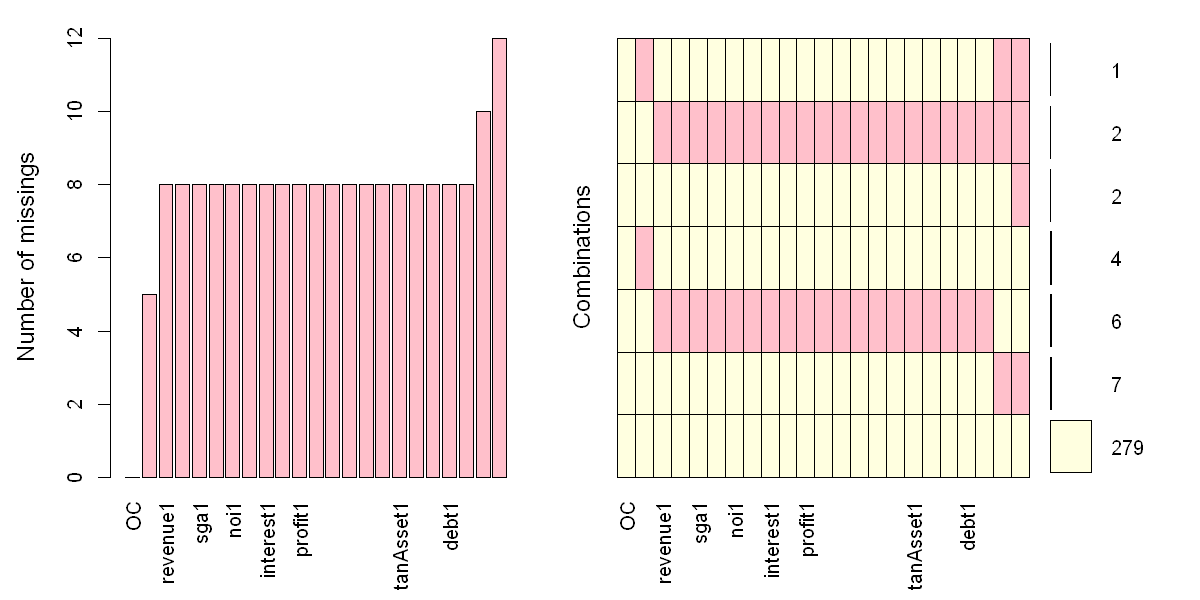

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)
dataset %>% aggr(col = c('lightyellow','pink'),
             prop = FALSE, numbers = TRUE)

시각화 결과, NA가 하나도 없는 행은 총 279개인 것으로 나타났다. 즉 NA의 총 개수는 179개인 반면 행을 기준으로 보았을 때에는 총 301행 중 22행에만 NA가 있는 것이다. 또한 오른쪽 플랏을 통해 상당히 많은 변수에서 동시에 missing이 일어난 경우가 있음을 직관적으로 파악할 수 있어 완전히 랜덤하게 생긴 NA가 아닌, 특정 관찰값에의 문제로 인해 생긴 NA가 다수 존재하는 것으로 결론내릴 수 있었다. 더불어 타겟 변수인 변수 'OC'에는 다행히 NA가 없었으며, 변수 'ownerChange'에 가장 많은 NA가 있는 것으로 나타났다.

### 문제 3-1 숫자 데이터 NA - mean imputation

In [7]:
mean_imp = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))

In [8]:
dataset[sapply(dataset, is.numeric)] = dataset[sapply(dataset, is.numeric)] %>% lapply(mean_imp) %>% as.data.frame()

In [9]:
# 숫자 데이터 NA 개수
dataset[,2:22] %>% is.na %>% sum

[1] 0

### 문제 3-2 범주 데이터 NA - mode imputation

In [10]:
# 범주 데이터의 현 NA 개수
dataset[,1] %>% is.na %>% sum
dataset[,23] %>% is.na %>% sum

[1] 0

[1] 12

In [11]:
mode = function(x){
    unq = unique(x)
    mode = unq[which.max(tabulate(match(x, unq)))]
    mode
}

In [12]:
# NA가 있는 23번째 열 'ownerChange'에 대해서
temp = as.matrix(dataset[,23])
temp[is.na(temp)] = mode(dataset[!is.na(dataset[,23]),23])
dataset[,23] = temp

In [13]:
dataset %>% is.na %>% sum

[1] 0

### 문제 4 타겟 변수 'OC(병원 개/폐업 여부)' 값 변환('open' > 1 & 'close' > 0)

In [14]:
dataset$OC = ifelse(dataset$OC == 'open', 1, 0)
dataset %>% head()

,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,surplus1,employee1,ownerChange
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int64>,<int64>,<int64>,<int64>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int64>,<dbl>,<dbl>,"<chr[,1]>"
1,1,175,4217530010,0,3961134739,2033835290,15652441,15236236,13236236,31641798,...,470055740,15027807,2514586477,2360683543,143449600,0.0,682825991,1496394171,62,same
2,1,410,12881747448,2014902795,10332439064,5654114567,269615124,511587022,186896557,78473220,...,697586158,115453344,11406727757,10534082118,340650297,251680.2,8765309695,1265934904,801,same
3,1,468,1004521989,515483669,447219722,296402310,76156,30000,0,0,...,8095950,18759968,120481028,120481028,0,0.0,92414342,0,234,same
4,1,353,72507342181,0,70677397660,31786048663,506223059,1259567512,1196881219,173769780,...,0,1506793440,43179356963,38320784344,3945208068,0.0,42363797762,8643659325,663,same
5,1,196,49043538016,0,47656051197,24460782270,112352259,1419089382,1307248652,0,...,4099320115,443818577,43667333124,43306130668,222340000,0.0,49898105519,9025549604,206,same
6,1,243,33580536703,9222996930,23727912054,16655333342,65414325,741269419,336462245,0,...,663481970,153424635,18649703167,18499383217,136458178,0.0,0,3664918487,397,same


### 문제 5 integer 자료형인 숫자 데이터의 numeric 자료형으로의 변환

In [15]:
dataset = dataset %>% lapply(function(x){if(class(x) == 'integer64') as.numeric(x) else x}) %>% as.data.frame()

Warning message in if (class(x) == "integer64") as.numeric(x) else x:
"length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다"


In [16]:
dataset %>% str()

'data.frame':	301 obs. of  23 variables:
 $ OC             : num  1 1 1 1 1 1 1 1 1 1 ...
 $ bedCount       : num  175 410 468 353 196 243 213 250 280 55 ...
 $ revenue1       : num  4.22e+09 1.29e+10 1.00e+09 7.25e+10 4.90e+10 ...
 $ salescost1     : num  0.00 2.01e+09 5.15e+08 0.00 0.00 ...
 $ sga1           : num  3.96e+09 1.03e+10 4.47e+08 7.07e+10 4.77e+10 ...
 $ salary1        : num  2.03e+09 5.65e+09 2.96e+08 3.18e+10 2.45e+10 ...
 $ noi1           : num  1.57e+07 2.70e+08 7.62e+04 5.06e+08 1.12e+08 ...
 $ noe1           : num  1.52e+07 5.12e+08 3.00e+04 1.26e+09 1.42e+09 ...
 $ interest1      : num  1.32e+07 1.87e+08 0.00 1.20e+09 1.31e+09 ...
 $ ctax1          : num  3.16e+07 7.85e+07 0.00 1.74e+08 0.00 ...
 $ profit1        : num  2.25e+08 2.10e+08 4.19e+07 9.03e+08 8.07e+07 ...
 $ liquidAsset1   : num  1.01e+09 3.54e+09 2.72e+08 1.30e+10 6.32e+09 ...
 $ quickAsset1    : num  9.98e+08 3.41e+09 2.54e+08 1.15e+10 5.87e+09 ...
 $ receivableS1   : num  4.70e+08 6.98e+08 8.10e+06 

## Chapter 2. 분류 모델

In [17]:
library(caret)
library(MLmetrics)
library(randomForest)

Warning message:
"package 'caret' was built under R version 4.0.4"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'MLmetrics' was built under R version 4.0.4"

Attaching package: 'MLmetrics'


The following objects are masked from 'package:caret':

    MAE, RMSE


The following object is masked from 'package:base':

    Recall


Warning message:
"package 'randomForest' was built under R version 4.0.4"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




### [ 모델 1 로지스틱 회귀 ]

### 문제 1 train set과 validation set 생성

In [18]:
dataset$OC = dataset$OC %>% as.factor

In [19]:
set.seed(1234)
val_idx = dataset$OC %>% createDataPartition(p = 0.3, list = FALSE)
train = dataset[-val_idx, ]
val = dataset[val_idx, ]

In [20]:
train %>% nrow
val %>% nrow

[1] 210

[1] 91

### 문제 2 Hold-out

In [21]:
logis_fit = glm(OC ~ ., data = train, family = binomial, maxit = 100)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [22]:
yhat = predict(logis_fit, val, type = 'response')
yhat = ifelse(yhat > 0.5, 1, 0)
MLmetrics::Accuracy(yhat, val$OC)

[1] 0.8681319

### 문제 3 Feature selection & Hold-out

In [23]:
stepwise = step(logis_fit, direction = 'both')

Start:  AIC=85.21
OC ~ bedCount + revenue1 + salescost1 + sga1 + salary1 + noi1 + 
    noe1 + interest1 + ctax1 + profit1 + liquidAsset1 + quickAsset1 + 
    receivableS1 + inventoryAsset1 + nonCAsset1 + tanAsset1 + 
    OnonCAsset1 + receivableL1 + debt1 + surplus1 + employee1 + 
    ownerChange



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance     AIC
- receivableL1     1    39.21   83.21
- salary1          1    39.23   83.23
- bedCount         1    39.34   83.34
- OnonCAsset1      1    39.34   83.34
- ctax1            1    39.65   83.65
- ownerChange      1    39.86   83.86
- employee1        1    40.02   84.02
- sga1             1    40.20   84.20
- revenue1         1    40.22   84.22
- salescost1       1    40.22   84.22
- profit1          1    40.24   84.24
- noe1             1    40.25   84.25
- noi1             1    40.30   84.30
- surplus1         1    40.85   84.85
<none>                  39.21   85.21
- debt1            1    41.26   85.26
- receivableS1     1    41.41   85.41
- inventoryAsset1  1    42.97   86.97
- liquidAsset1     1    43.31   87.31
- quickAsset1      1    43.35   87.35
- nonCAsset1       1    44.53   88.53
- interest1        1    46.71   90.71
- tanAsset1        1  1225.48 1269.48


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=83.21
OC ~ bedCount + revenue1 + salescost1 + sga1 + salary1 + noi1 + 
    noe1 + interest1 + ctax1 + profit1 + liquidAsset1 + quickAsset1 + 
    receivableS1 + inventoryAsset1 + nonCAsset1 + tanAsset1 + 
    OnonCAsset1 + debt1 + surplus1 + employee1 + ownerChange



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- salary1          1    39.23  81.23
- bedCount         1    39.34  81.34
- OnonCAsset1      1    39.34  81.34
- ctax1            1    39.65  81.65
- ownerChange      1    39.86  81.86
- employee1        1    40.02  82.02
- sga1             1    40.20  82.20
- revenue1         1    40.22  82.22
- salescost1       1    40.22  82.22
- profit1          1    40.24  82.24
- noe1             1    40.25  82.25
- noi1             1    40.30  82.30
- surplus1         1    40.85  82.85
<none>                  39.21  83.21
- debt1            1    41.26  83.26
- receivableS1     1    41.41  83.41
- inventoryAsset1  1    42.97  84.97
+ receivableL1     1    39.21  85.21
- liquidAsset1     1    43.31  85.31
- quickAsset1      1    43.35  85.35
- tanAsset1        1    43.73  85.73
- interest1        1    46.71  88.71
- nonCAsset1       1   937.13 979.13


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=81.23
OC ~ bedCount + revenue1 + salescost1 + sga1 + noi1 + noe1 + 
    interest1 + ctax1 + profit1 + liquidAsset1 + quickAsset1 + 
    receivableS1 + inventoryAsset1 + nonCAsset1 + tanAsset1 + 
    OnonCAsset1 + debt1 + surplus1 + employee1 + ownerChange



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- OnonCAsset1      1    39.35  79.35
- bedCount         1    39.40  79.40
- ctax1            1    39.69  79.69
- ownerChange      1    39.89  79.89
- employee1        1    40.13  80.13
- sga1             1    40.23  80.23
- revenue1         1    40.24  80.24
- salescost1       1    40.25  80.25
- profit1          1    40.27  80.27
- noe1             1    40.28  80.28
- noi1             1    40.34  80.34
- surplus1         1    40.89  80.89
<none>                  39.23  81.23
- debt1            1    41.29  81.29
- receivableS1     1    41.99  81.99
+ salary1          1    39.21  83.21
+ receivableL1     1    39.23  83.23
- inventoryAsset1  1    43.49  83.49
- liquidAsset1     1    43.84  83.84
- quickAsset1      1    43.88  83.88
- tanAsset1        1    43.98  83.98
- interest1        1    46.71  86.71
- nonCAsset1       1   720.87 760.87


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=79.35
OC ~ bedCount + revenue1 + salescost1 + sga1 + noi1 + noe1 + 
    interest1 + ctax1 + profit1 + liquidAsset1 + quickAsset1 + 
    receivableS1 + inventoryAsset1 + nonCAsset1 + tanAsset1 + 
    debt1 + surplus1 + employee1 + ownerChange



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- bedCount         1   39.472 77.472
- ctax1            1   39.780 77.780
- ownerChange      1   40.100 78.100
- employee1        1   40.243 78.243
- sga1             1   40.336 78.336
- revenue1         1   40.357 78.357
- salescost1       1   40.362 78.362
- profit1          1   40.390 78.390
- noe1             1   40.397 78.397
- noi1             1   40.463 78.463
- surplus1         1   41.033 79.033
<none>                 39.349 79.349
- debt1            1   42.054 80.054
- receivableS1     1   42.429 80.429
+ OnonCAsset1      1   39.235 81.235
+ salary1          1   39.339 81.339
+ receivableL1     1   39.349 81.349
- inventoryAsset1  1   43.595 81.595
- liquidAsset1     1   43.977 81.977
- quickAsset1      1   44.014 82.014
- tanAsset1        1   44.363 82.363
- nonCAsset1       1   45.165 83.165
- interest1        1   47.444 85.444


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=77.47
OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + interest1 + 
    ctax1 + profit1 + liquidAsset1 + quickAsset1 + receivableS1 + 
    inventoryAsset1 + nonCAsset1 + tanAsset1 + debt1 + surplus1 + 
    employee1 + ownerChange



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- ctax1            1   39.857 75.857
- ownerChange      1   40.267 76.267
- sga1             1   40.389 76.389
- revenue1         1   40.409 76.409
- salescost1       1   40.413 76.413
- profit1          1   40.440 76.440
- noe1             1   40.448 76.448
- noi1             1   40.500 76.500
- surplus1         1   41.222 77.222
- employee1        1   41.235 77.235
<none>                 39.472 77.472
- debt1            1   42.129 78.129
- receivableS1     1   42.770 78.770
+ bedCount         1   39.349 79.349
+ OnonCAsset1      1   39.404 79.404
+ salary1          1   39.439 79.439
+ receivableL1     1   39.472 79.472
- inventoryAsset1  1   43.595 79.595
- liquidAsset1     1   43.977 79.977
- quickAsset1      1   44.014 80.014
- tanAsset1        1   44.688 80.688
- nonCAsset1       1   45.723 81.723
- interest1        1   47.583 83.583


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=75.86
OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + interest1 + 
    profit1 + liquidAsset1 + quickAsset1 + receivableS1 + inventoryAsset1 + 
    nonCAsset1 + tanAsset1 + debt1 + surplus1 + employee1 + ownerChange



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- ownerChange      1   40.768 74.768
- surplus1         1   41.222 75.222
<none>                 39.857 75.857
- employee1        1   41.989 75.989
- debt1            1   42.843 76.843
- receivableS1     1   42.904 76.904
+ ctax1            1   39.472 77.472
+ bedCount         1   39.780 77.780
+ OnonCAsset1      1   39.804 77.804
+ salary1          1   39.830 77.830
+ receivableL1     1   39.857 77.857
- sga1             1   44.019 78.019
- inventoryAsset1  1   44.127 78.127
- revenue1         1   44.245 78.245
- salescost1       1   44.304 78.304
- noe1             1   44.394 78.394
- liquidAsset1     1   44.603 78.603
- profit1          1   44.616 78.616
- quickAsset1      1   44.639 78.639
- tanAsset1        1   44.688 78.688
- noi1             1   45.422 79.422
- nonCAsset1       1   45.723 79.723
- interest1        1   48.247 82.247


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=74.77
OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + interest1 + 
    profit1 + liquidAsset1 + quickAsset1 + receivableS1 + inventoryAsset1 + 
    nonCAsset1 + tanAsset1 + debt1 + surplus1 + employee1



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- surplus1         1   41.913 73.913
<none>                 40.768 74.768
- employee1        1   43.327 75.327
- receivableS1     1   43.842 75.842
+ ownerChange      1   39.857 75.857
+ ctax1            1   40.267 76.267
- sga1             1   44.529 76.529
+ OnonCAsset1      1   40.623 76.623
+ bedCount         1   40.664 76.664
+ salary1          1   40.752 76.752
- revenue1         1   44.766 76.766
+ receivableL1     1   40.768 76.768
- salescost1       1   44.817 76.817
- debt1            1   44.866 76.866
- noe1             1   44.933 76.933
- profit1          1   45.174 77.174
- tanAsset1        1   45.605 77.605
- inventoryAsset1  1   45.857 77.857
- noi1             1   45.952 77.952
- liquidAsset1     1   46.559 78.559
- quickAsset1      1   46.592 78.592
- nonCAsset1       1   46.928 78.928
- interest1        1   51.020 83.020


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=73.91
OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + interest1 + 
    profit1 + liquidAsset1 + quickAsset1 + receivableS1 + inventoryAsset1 + 
    nonCAsset1 + tanAsset1 + debt1 + employee1



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
<none>                 41.913 73.913
+ surplus1         1   40.768 74.768
- sga1             1   44.822 74.822
- receivableS1     1   44.987 74.987
- revenue1         1   45.104 75.104
- salescost1       1   45.172 75.172
- employee1        1   45.181 75.181
- noe1             1   45.221 75.221
+ ownerChange      1   41.222 75.222
- debt1            1   45.370 75.370
- profit1          1   45.598 75.598
+ bedCount         1   41.655 75.655
+ OnonCAsset1      1   41.830 75.830
- tanAsset1        1   45.847 75.847
+ salary1          1   41.892 75.892
+ receivableL1     1   41.913 75.913
+ ctax1            1   41.913 75.913
- noi1             1   46.110 76.110
- nonCAsset1       1   47.031 77.031
- inventoryAsset1  1   49.319 79.319
- liquidAsset1     1   49.995 79.995
- quickAsset1      1   50.045 80.045
- interest1        1   51.947 81.947


In [24]:
summary(stepwise)


Call:
glm(formula = OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + 
    interest1 + profit1 + liquidAsset1 + quickAsset1 + receivableS1 + 
    inventoryAsset1 + nonCAsset1 + tanAsset1 + debt1 + employee1, 
    family = binomial, data = train, maxit = 100)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.70186   0.00000   0.03618   0.19289   1.29194  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.071e+00  8.601e-01   3.571 0.000356 ***
revenue1         3.274e-08  2.998e-08   1.092 0.274823    
salescost1      -3.293e-08  3.000e-08  -1.098 0.272419    
sga1            -3.170e-08  2.993e-08  -1.059 0.289511    
noi1             3.871e-08  3.082e-08   1.256 0.209169    
noe1            -3.487e-08  3.069e-08  -1.136 0.255963    
interest1       -1.853e-08  7.333e-09  -2.527 0.011513 *  
profit1         -3.428e-08  3.009e-08  -1.140 0.254481    
liquidAsset1     3.129e-03  1.535e-01   0.020 0.983733    
quickAsset1

단계적 선택법 결과 선택된 변수들:  
* revenue1             
* salescost1          
* sga1                
* noi1            
* noe1             
* interest1        
* profit1          
* liquidAsset1       
* quickAsset1      
* receivableS1    
* inventoryAsset1 
* nonCAsset1       
* tanAsset1         
* debt1              
* employee1    

In [25]:
yhat = predict(stepwise, val, type = 'response')
yhat = ifelse(yhat > 0.5, 1, 0)
MLmetrics::Accuracy(yhat, val$OC)

[1] 0.8901099

### [ 모델 2 랜덤포레스트 ]

### 문제 4 그리드서치 결과 담을 데이터프레임 생성

In [26]:
acc_rf = expand.grid(mtry = c(3,4,5), acc = NA)
acc_rf

mtry,acc
<dbl>,<lgl>
3,NA
4,NA
5,NA


### 문제 5 randomforest 5-fold CV 그리드서치

In [27]:
set.seed(1234)
rf.cv <- createFolds(train$OC, k = 5, list = TRUE)

train <- train %>% mutate_if(is.character, as.factor)

for (i in 1:nrow(acc_rf)){
  print(paste0("mtry : ", acc_rf$mtry[i], ", ntree : 10"))
  rf.acc_temp <- c()
  
  for (j in 1:5){
    print(paste0("FOLD : ", j))
    
    rf.vali_inx <- rf.cv[[j]] 
    rf.train <- train[-rf.vali_inx,]
    rf.val <- train[rf.vali_inx,]
    
    set.seed(1234)
    rf_model <- randomForest(OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + 
                                interest1 + profit1 + liquidAsset1 + quickAsset1 +
                                receivableS1 + inventoryAsset1 + nonCAsset1 + tanAsset1 + 
                                debt1 + employee1, 
                                data = rf.train, mtry = acc_rf$mtry[i], ntree = 10)
    
    rf.yhat = predict(rf_model, newdata = dplyr::select(rf.val, c(revenue1, salescost1, sga1, noi1, noe1, 
                             interest1, profit1, liquidAsset1, quickAsset1, receivableS1, inventoryAsset1, 
                             nonCAsset1, tanAsset1, debt1, employee1)))
    rf.acc = MLmetrics::Accuracy(rf.yhat, rf.val$OC)
    rf.acc_temp[j] = rf.acc
  }
  acc_rf[i,"acc"] = mean(rf.acc_temp)
}

[1] "mtry : 3, ntree : 10"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 4, ntree : 10"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 5, ntree : 10"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"


In [28]:
acc_rf

mtry,acc
<dbl>,<dbl>
3,0.9380952
4,0.9380952
5,0.9333333


### 문제 6 Accuracy가 가장 높은 파라미터 조합

In [29]:
acc_rf %>% subset(acc_rf$acc == max(acc_rf$acc))

,mtry,acc
,<dbl>,<dbl>
1,3,0.9380952
2,4,0.9380952


### 문제 7 최적의 파라미터로 모델 학습

In [30]:
set.seed(1234)
rf_fit <- randomForest(OC ~ revenue1 + salescost1 + sga1 + noi1 + noe1 + 
                       interest1 + profit1 + liquidAsset1 + quickAsset1 + 
                       receivableS1 + inventoryAsset1 + nonCAsset1 + tanAsset1 + 
                       debt1 + employee1,
                       data = train, mtry = 3, ntree = 10)

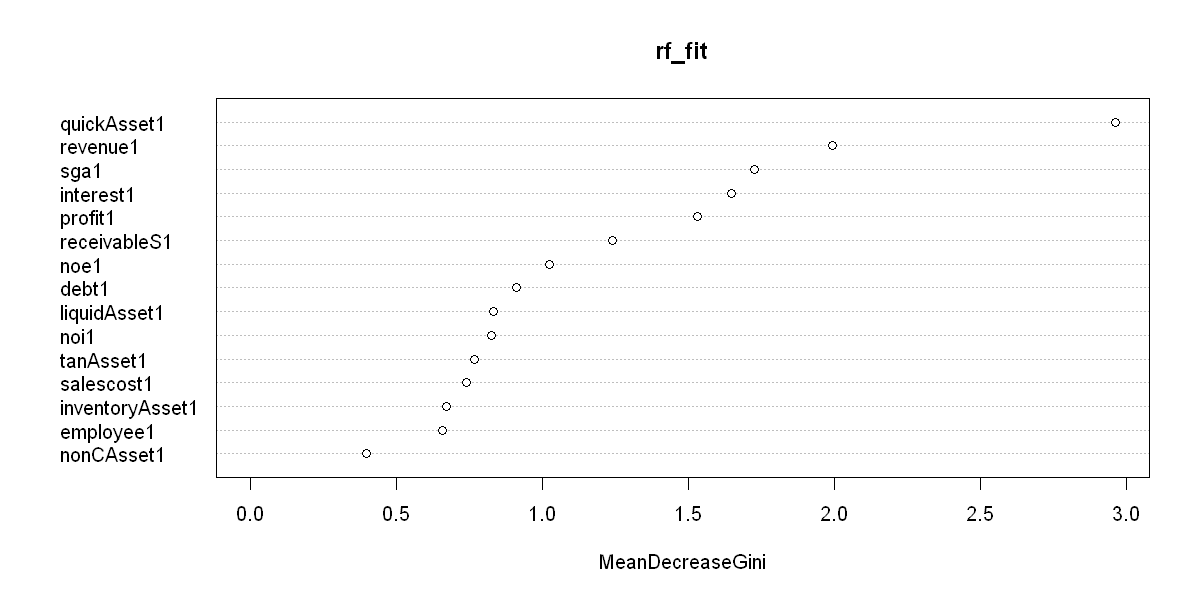

In [31]:
impplot = varImpPlot(rf_fit) %>% as.data.frame()
impplot$variable = rownames(impplot)

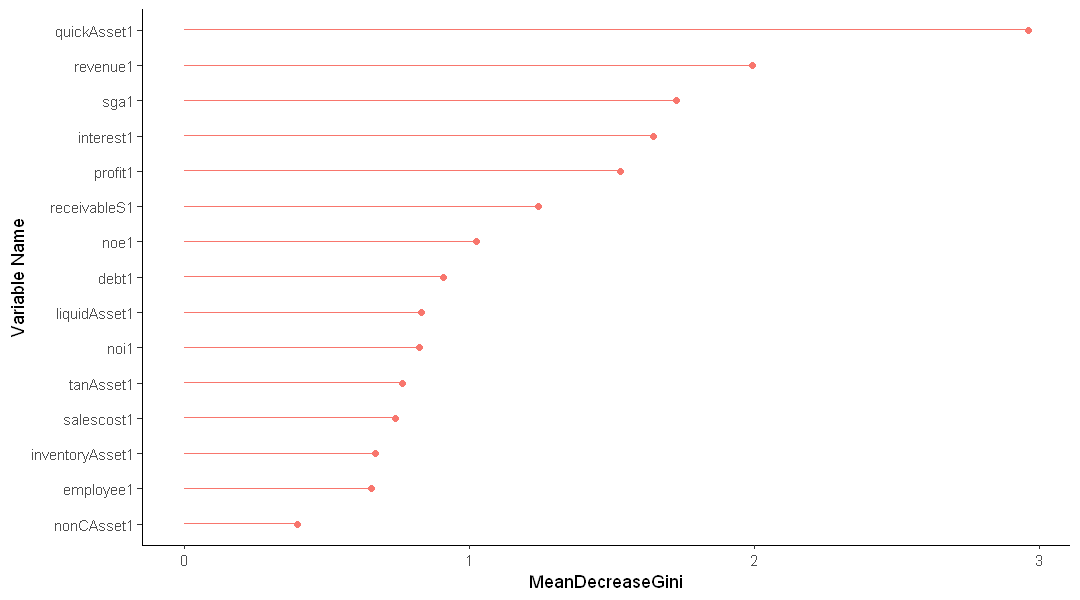

In [32]:
options(repr.plot.width = 9, repr.plot.height = 5)
impplot %>% ggplot(aes(x = MeanDecreaseGini, y = reorder(variable, MeanDecreaseGini))) + 
  geom_bar(stat = 'identity', aes(fill = 'pink'), show.legend = FALSE, width = 0.03) +
  geom_point(aes(color = 'pink'), show.legend = FALSE) +
  labs(y = 'Variable Name') +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank())

MeanDecreaseGini값을 통해 quickAsset1 변수가 의사결정, 특히 노드 불순도 개선에 있어 가장 높은 중요도를 가지는 것으로 나타났고, revenu1, sga1, interest1, profit1 등이 그 뒤를 이었다. 이 변수들을 사용하면 불확실성을 줄여 더욱 정확하고 만족스러운 classification 결과를 얻을 수 있을 것으로 보인다. 반면 가장 중요치 않은 것으로 나타난 변수는 nonCAsset1이었다.

## Chapter 3. 회귀 모델

In [33]:
library(MASS)


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




### 문제 1 train set과 test set 생성

In [34]:
Boston %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [35]:
set.seed(1234)
test_idx = Boston$medv %>% createDataPartition(p = 0.2, list = FALSE)
Bostrain = Boston[-test_idx, ]
Bostest = Boston[test_idx, ]

In [36]:
Bostrain %>% nrow
Bostest %>% nrow

[1] 403

[1] 103

### 문제 2 그리드서치 결과 담을 데이터프레임 생성

In [37]:
RMSE_rf = expand.grid(mtry = c(3,4,5), ntree = c(10,100,200), RMSE = NA)
RMSE_rf

mtry,ntree,RMSE
<dbl>,<dbl>,<lgl>
3,10,NA
4,10,NA
5,10,NA
3,100,NA
4,100,NA
5,100,NA
3,200,NA
4,200,NA
5,200,NA


### 문제 3 randomforest 5-fold CV 그리드서치

In [38]:
set.seed(1234)
rf.cv <- createFolds(Bostrain$medv, k = 5, list = TRUE)

Bostrain$chas <- Bostrain$chas %>% as.factor()

for (i in 1:nrow(RMSE_rf)){
  print(paste0("mtry : ", RMSE_rf$mtry[i], ", ntree : ", RMSE_rf$ntree[i]))
  rf.RMSE_temp <- c()
  
  for (j in 1:5){
    print(paste0("FOLD : ", j))
    
    rf.vali_inx <- rf.cv[[j]] 
    rf.train <- Bostrain[-rf.vali_inx,]
    rf.val <- Bostrain[rf.vali_inx,]
    
    set.seed(1234)
    rf_model <- randomForest(medv ~ ., data = rf.train, mtry = RMSE_rf$mtry[i], ntree = RMSE_rf$ntree[i])
    rf.yhat = predict(rf_model, newdata = dplyr::select(rf.val, -medv))
      
    rf.RMSE = MLmetrics::RMSE(rf.yhat, rf.val$medv)
    rf.RMSE_temp[j] = rf.RMSE
  }
  RMSE_rf[i,"RMSE"] = mean(rf.RMSE_temp)
}

[1] "mtry : 3, ntree : 10"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 4, ntree : 10"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 5, ntree : 10"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 3, ntree : 100"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 4, ntree : 100"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 5, ntree : 100"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 3, ntree : 200"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 4, ntree : 200"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "mtry : 5, ntree : 200"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"


In [39]:
RMSE_rf

mtry,ntree,RMSE
<dbl>,<dbl>,<dbl>
3,10,3.751175
4,10,3.750996
5,10,3.706612
3,100,3.527113
4,100,3.521439
5,100,3.518209
3,200,3.538739
4,200,3.504482
5,200,3.488622


### 문제 4 RMSE가 가장 낮은 파라미터 조합

In [40]:
RMSE_rf %>% subset(RMSE_rf$RMSE == min(RMSE_rf$RMSE))

,mtry,ntree,RMSE
,<dbl>,<dbl>,<dbl>
9,5,200,3.488622


### 문제 5 최적의 파라미터로 모델 학습

In [41]:
Bostest$chas = Bostest$chas %>% as.factor()

set.seed(1234)
rf_fit = randomForest(medv ~ ., data = Bostrain, mtry = 5, ntree = 200)
rf.yhat = predict(rf_fit, newdata = dplyr::select(Bostest, -medv))
MLmetrics::RMSE(rf.yhat, Bostest$medv)

[1] 4.084385